<a href="https://colab.research.google.com/github/NeptuneAndre/DIT650_Tech-Tool-2/blob/main/TFX_LSTM_CleanGAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tfx tensorflow-transform


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while

In [1]:
# Install required libraries
!pip install tfx==1.15.1 tensorflow==2.15.0


INFO: pip is looking at multiple versions of tensorflow-serving-api to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_model_analysis-0.46.0-py3-none-any.whl.metadata (20 kB)
  Using cached tensorflow_data_validation-1.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached tfx-1.15.1-py3-none-any.whl.metadata (23 kB)
INFO: pip is still looking at multiple versions of tensorflow-serving-api to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install tensorflow-serving-api==2.15.1, tensorflow==2.15.0, tfx and tfx==1.15.1 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested tensorflow==2.15.0
    tfx 1.15.1 depends on tensorflow<2.16 and >=2.15.0
    tensorflow-data-validation 1.15.1 depends on tensorflow<2.16 and >=2.15
    tensorflow-model-analysis 0.46.0 depends on tens

In [2]:
from google.colab import files
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os

# Upload the dataset
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print(data.head())


Saving Cleaned_Gassing_Dataset.csv to Cleaned_Gassing_Dataset (1).csv
   Temperature  State of Charge  Gassing
0     1.000000         0.605082        0
1     0.712035         0.633818        0
2     0.547423         0.898778        0
3     0.447073         0.786149        0
4     0.113936         0.845646        0


In [4]:
# Select features and target
# Replace 'target' with the actual name of your target column in the DataFrame
target_column_name = 'State of Charge'  # Assuming your target column is named 'State of Charge'
features = data.drop(columns=[target_column_name])
target = data[target_column_name]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.2, random_state=42)

# Reshape data for LSTM (LSTM expects 3D input: samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [6]:
# Define the LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             17152     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29601 (115.63 KB)
Trainable params: 29601 (115.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
25/25 [==============================] - 5s 23ms/step - loss: 0.3919 - mae: 0.5781 - val_loss: 0.3265 - val_mae: 0.5213
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3235 - mae: 0.5159 - val_loss: 0.2497 - val_mae: 0.4399
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2264 - mae: 0.4128 - val_loss: 0.1454 - val_mae: 0.3160
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.1219 - mae: 0.2932 - val_loss: 0.0813 - val_mae: 0.2373
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0850 - mae: 0.2354 - val_loss: 0.0649 - val_mae: 0.2136
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0715 - mae: 0.2171 - val_loss: 0.0570 - val_mae: 0.2013
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0635 - mae: 0.2032 - val_loss: 0.0527 - val_mae: 0.1920
Epoch 8/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0640 - mae: 0.2

In [8]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Generate predictions
predictions = model.predict(X_test)
print("Sample Predictions:", predictions[:5])


Test Loss: 0.04708249866962433
Test MAE: 0.1775606870651245
7/7 [==============================] - 0s 2ms/step
Sample Predictions: [[0.61615545]
 [0.35629666]
 [0.6185581 ]
 [0.6154162 ]
 [0.35103273]]


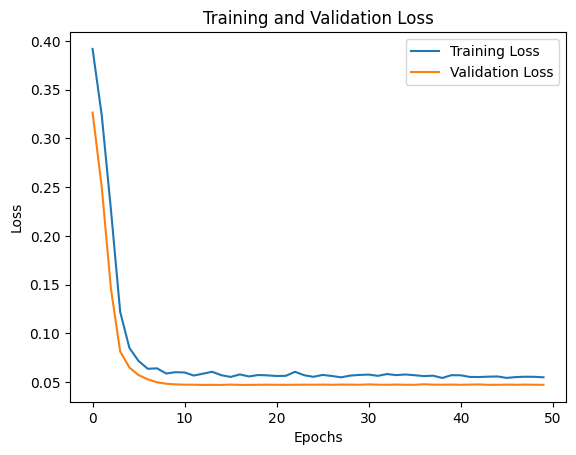

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
